In [54]:
import pandas as pd

# Load the Excel file to inspect its structure
file_path = r"C:\Users\Nicola\Documents\Gestione\INTERNSHIP\9_05\Dati conduttivita termica.xlsx"
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names
# Load the data from the only sheet
df = xls.parse('Foglio1')
df.head()


,thermal conductivity,temperature,Unnamed: 2,Unnamed: 3,Unnamed: 4,plate temp
0,22.00,293.15,NaN,NaN,NaN,30.0
1,2.00,20.00,NaN,NaN,NaN,2.0
2,0.50,4.00,NaN,NaN,NaN,NaN
3,0.06,1.00,NaN,NaN,NaN,NaN


We want to estimate the **thermal dissipation** of two wires connecting the environment to two plates of the Cryocooler (Sumitomo). The first plate is at **30 K** and the second at **2 K**.
Thermal dissipation shouldn't be higher than 0.5 W

The wires under inspections are Manganin wires for low temperature applications. 
I report here two links if further information were needed
https://www.allectra.com/wp-content/uploads/2025/02/312-KAP-MAN-E.pdf

https://www.allectra.com/products/312-kap-man-014-5m/


Idea : the initial assumption here is that k=k(T) and therefore I want to perform a polynomial fit, which can be expressed as a linear fit for the lograithms of k and T values. 

If we get $logk= p log T + cost$ then we'll have $k= C T^p$ with $C= exp(cost)$

Fitted model: k = 1.00698 * (T) + -2.46382


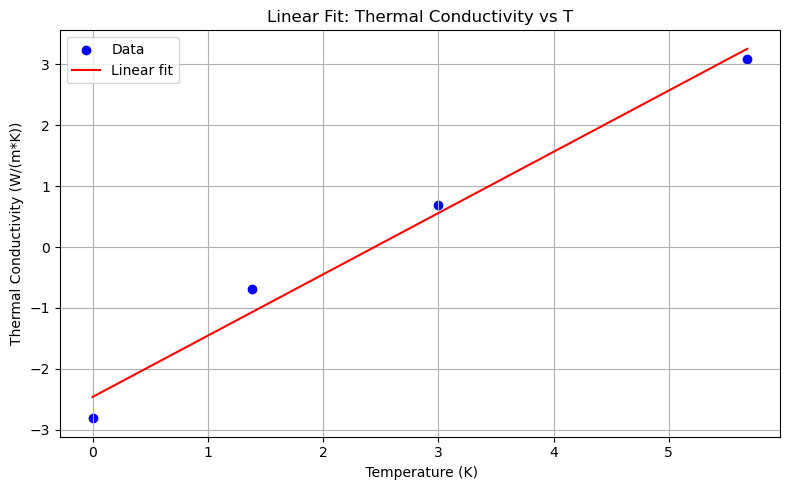

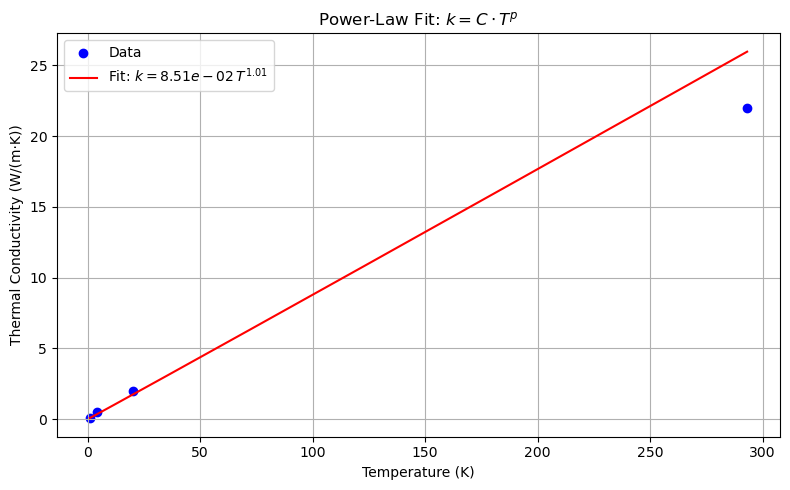

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select the relevant columns and drop NaNs
data = df[['temperature', 'thermal conductivity']].dropna()



# Take logarithms
log_T = np.log(data['temperature'].values).reshape(-1, 1)
log_k = np.log(data['thermal conductivity'].values)

# Fit a linear model: 
model = LinearRegression()
model.fit(log_T, log_k)
log_k_pred = model.predict(log_T)

# Extract the fit parameters
a = model.coef_[0]
b = model.intercept_

print(f"Fitted model: k = {a:.5f} * (T) + {b:.5f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(log_T, log_k, color='blue', label='Data')
plt.plot(log_T, log_k_pred, color='red', label='Linear fit')

plt.xlabel(' Temperature (K)')
plt.ylabel('Thermal Conductivity (W/(m*K))')
plt.title('Linear Fit: Thermal Conductivity vs T')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

x= (data['temperature'].values).reshape(-1, 1)
y= data['thermal conductivity'].values

p= model.coef_[0]
C= np.exp(model.intercept_)

# Predict values from fit
T_fit = np.linspace(min(x), max(x), 300)
k_fit = C * T_fit**p

# Plot in linear space
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(T_fit, k_fit, color='red', label=f'Fit: $k = {C:.2e} \\, T^{{{p:.2f}}}$')
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/(m·K))')
plt.title('Power-Law Fit: $k = C \\cdot T^p$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Then, in order to get the actual dissipated heat, we will use Fourier heat law. 
We have $ q^{\cdot}= k(T) \frac{dT}{dx} $. Here  $q^{\cdot}$ is the power flux, and we may write $q^{\cdot}= Q A$ where Q is the heat power. 
This differential equation can be solved by separating variables. 
$ q^{\cdot} dx = k(T)dT= CT^p dT$ . Integrating on both sides. 

$q^{\cdot}L = \frac{C}{p+1}(T_f^{p+1}-T_i^{p+1})$, which gives 

$Q= \frac{A}{L} \frac{C}{p+1}(T_f^{p+1}-T_i^{p+1})$


In this case, $T_f$ and  $T_i$  are the temperatures of the two systems connected by the two wires for which we want to estimate the thermal dissipation.

In [56]:
# compute the heat flow 
import math 
#write all relevant physical quantities 
A=math.pi*(1.4**2)*1e-8# sezione del  filo in metri
L_1=0.5 # lunghezza del primo filo 
L_2= 0.5 #lunghezza del secondo filo 
T_env=293
T_1=30 
T_2= 2
 # in Kelvin 
    
Q_A=(A/L_1)*C*(1/(p+1))*(T_env**(p+1)-T_1**(p+1))
Q_B=(A/L_2)*C*(1/(p+1))*(T_1**(p+1)-T_2**(p+1))
#sono dei Q_punti, sono in Watt

print("Q_A= ", Q_A, "W"," ;Q_B= ",Q_B, "W") 

Q_A=  0.0004616464516215785 W  ;Q_B=  4.792026781941222e-06 W


Fitted model: k = 1.16228 * (T) + -2.63552


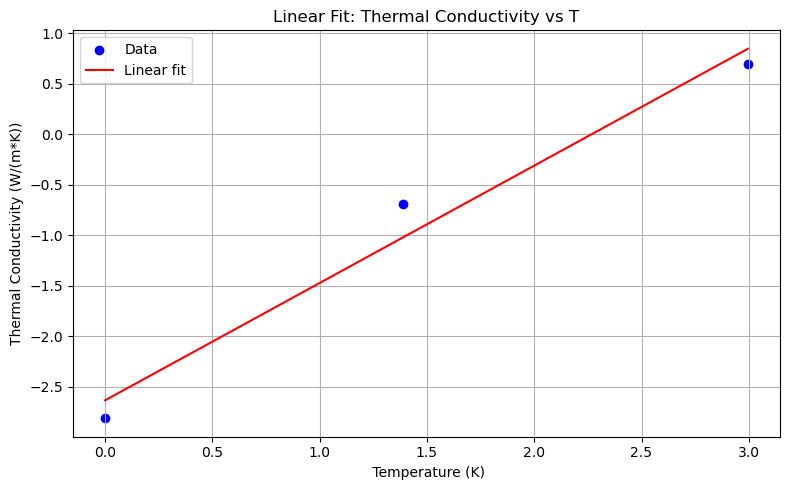

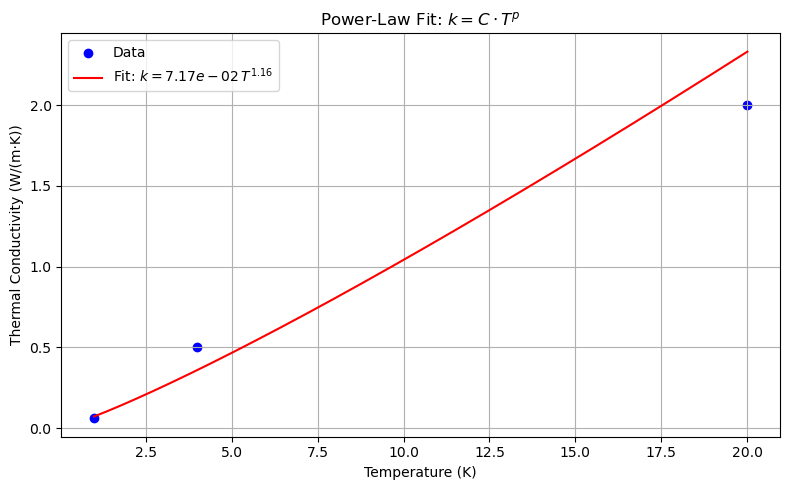

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select the relevant columns and drop NaNs
data = df[['temperature', 'thermal conductivity']].dropna().iloc[1:]



# Take logarithms
log_T = np.log(data['temperature'].values).reshape(-1, 1)
log_k = np.log(data['thermal conductivity'].values)

# Fit a linear model: 
model = LinearRegression()
model.fit(log_T, log_k)
log_k_pred = model.predict(log_T)

# Extract the fit parameters
a = model.coef_[0]
b = model.intercept_

print(f"Fitted model: k = {a:.5f} * (T) + {b:.5f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(log_T, log_k, color='blue', label='Data')
plt.plot(log_T, log_k_pred, color='red', label='Linear fit')

plt.xlabel(' Temperature (K)')
plt.ylabel('Thermal Conductivity (W/(m*K))')
plt.title('Linear Fit: Thermal Conductivity vs T')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

x= (data['temperature'].values).reshape(-1, 1)
y= data['thermal conductivity'].values

p= model.coef_[0]
C= np.exp(model.intercept_)

# Predict values from fit
T_fit = np.linspace(min(x), max(x), 300)
k_fit = C * T_fit**p

# Plot in linear space
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(T_fit, k_fit, color='red', label=f'Fit: $k = {C:.2e} \\, T^{{{p:.2f}}}$')
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/(m·K))')
plt.title('Power-Law Fit: $k = C \\cdot T^p$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# compute the heat flow 
import math 

A=math.pi*(1.4**2)*1e-8# sezione del  filo in metri
L_1=0.5 # lunghezza del primo filo 
L_2= 0.5 #lunghezza del secondo filo 
T_env=293
T_1=30 
T_2= 2
 # in Kelvin 
    
Q_A=(A/L_1)*C*(1/(p+1))*(T_env**(p+1)-T_1**(p+1))
Q_B=(A/L_2)*C*(1/(p+1))*(T_1**(p+1)-T_2**(p+1))
#sono dei Q_punto, sono in Watt

print("Q_A= ", Q_A, "W"," ;Q_B= ",Q_B, "W")

Q_A=  0.0008746676955393157 W  ;Q_B=  6.362688457875588e-06 W


The result is many orders of magnitude under our threshold and the result does not change significantly whether we remove or not the last point of the plot, the one that diverges the most from the trend of all the others. 